# Uso y manipulación de datos

En este notebook vamos a ver la aplicación de alguna función de numpy muy útil cuando usamos tablas de datos.

Como ejemplo se han tomado los mapas de relieve MDT200 disponibles en la página web del Centro Nacional de Información Geográfica, en concreto los que se refieren a las zonas geográficas de Segovia y Madrid. Estos mapas se caracterizan por tener un mallado con nodos equiespaciados 200m.

Puede comprobarse (en los archivos MDT200-MADRID-H30.asc y MDT200-SEGOVIA-H30.asc de la carpeta static) que el formato de los archivos es el siguiente:
    
    NCOLS 856
    NROWS 679
    XLLCENTER 334200
    YLLCENTER 4483800
    CELLSIZE 200
    NODATA_VALUE -999
    780.196 768.848 766.627 796.561 803.958 786.04 790.837 792.313 823.365 822.689 816.315 840.917 841.474 844.961 843.518 843.679 844.08 844.775 845.82 846.028 844.369 843.475 840.439 839.535 839.923 840.965 841.736 841.737 843.698 843.649 841.975 843.277 ...

donde NCOLS indica el numero de columnas que tiene la matriz de datos; NROWS indica el numero de filas, XLLCENTER e YLLCENTER son indicadores de la ubicación de mapa geográficamente hablando (posición de la esquina inferior izquierda). Finalmente CELLSIZE indica la distancia entre nodos.

La matriz de elevaciones viene dada en metros.

Para pintar los mapas vamos a usar la librería matplotlib, y para tratar los datos numpy. Importamos las librerías:

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# SEGOVIA

Empezamos con el mapa de Segovia.

Lo primero va a ser guardar la matriz de datos en una variable llamada relieve_seg. Para ello usaremos la función np.loadtxt() (como puedes comprobar, el archivo puede tener un formato diferente al .txt, en este caso .asc) .Como las 6 primeras lineas son de cabeceros hay que evitarlas y para ello se usa la opción skiprows.

In [3]:
relieve_seg = np.loadtxt("../mapas/static/MDT200-SEGOVIA-H30.asc", skiprows=6)
# relieve tiene las cotas de en metros, de norte a sur, de oeste a este.

Para conocer el numero de filas y de columnas que tiene nuestra matriz podríamos usar directamente la función np.shape de numpy. Sin embargo, con el objetivo de ver como leer lineas en un archivo de datos, abriremos el archivo y usaremos el método readline():

In [4]:
# numero de columnas y de filas:

# se abre el archivo para lectura ('r' y se guarda en una variable seg.)
with open('../mapas/static/MDT200-SEGOVIA-H30.asc', 'r') as seg:
    # se lee de la primera linea el numero de columnas y de la segunda el de filas. Como el método readline() devuelve un único
    # string, se usa el método split (convierte un string en una lista de strings) y nos quedamos con el segundo elemento [1]:
    N_col_seg = int(seg.readline().split()[1]) 
    N_fil_seg = int(seg.readline().split()[1])

# Generamos los ejes del mapa. multiplicamos el número de filas y de columnas por la distancia entre nodos: 0.2km
x_seg = np.arange(0, N_col_seg*0.2, 0.2)
y_seg = np.arange(0, N_fil_seg*0.2, 0.2)
# Generamos la malla.
xx_seg, yy_seg = np.meshgrid(x_seg, y_seg)
yy_seg = yy_seg[::-1]

¿Por qué se ha usado el meshgrid y luego se ha cambiado el recorrido de yy_seg? Para que cuadre: al avanzar las filas vamos hacia el sur. La última fila es el borde sur y debe coincidir con el "km cero". Los kilómetros aumentan hacia el norte:

In [5]:
print((xx_seg+1j*yy_seg)[-1, 0:5])

[ 0.0+0.j  0.2+0.j  0.4+0.j  0.6+0.j  0.8+0.j]


Una vez que tenemos la matriz de elevación del terreno y la malla podemos pintarla.
Además la guardamos como "Segovia.png".

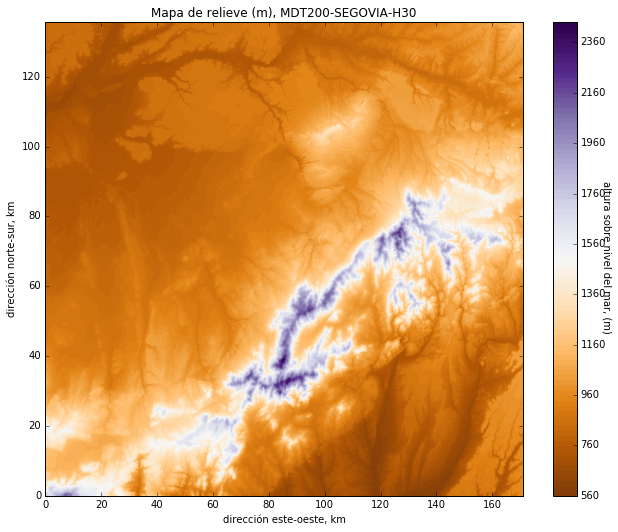

In [6]:
plt.figure(num=None, figsize=(N_col_seg/100 * 1.25, N_fil_seg/100*1.25), dpi=80)
plt.contourf(xx_seg, yy_seg, relieve_seg[:, :], 100, cmap=plt.cm.PuOr)
cbar = plt.colorbar()
cbar.set_label('altura sobre nivel del mar, (m) \n', rotation=270)
plt.savefig("../mapas/imagenes/Segovia.png")
plt.title("Mapa de relieve (m), MDT200-SEGOVIA-H30")
plt.xlabel("dirección este-oeste, km")
plt.ylabel("dirección norte-sur, km")

Se podrían añadir curvas de nivel al plano 2D

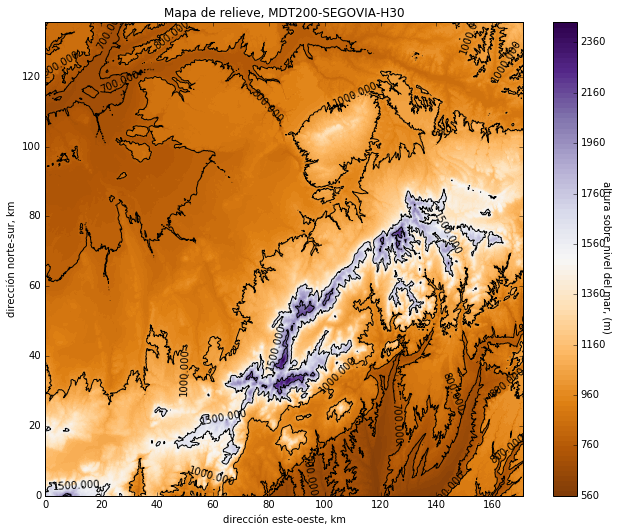

In [7]:
plt.figure(num=None, figsize=(N_col_seg/100 * 1.25, N_fil_seg/100*1.25), dpi=80)
plt.contourf(xx_seg, yy_seg, relieve_seg[:, :], 100, cmap=plt.cm.PuOr)
cbar = plt.colorbar()
cbar.set_label('altura sobre nivel del mar, (m) \n', rotation=270)
cs = plt.contour(xx_seg, yy_seg, relieve_seg[:,:], (700, 800, 1000, 1500, 2000), colors="black")
plt.clabel(cs)
plt.savefig("../mapas/imagenes/Segovia_ln.png")
plt.title("Mapa de relieve, MDT200-SEGOVIA-H30")
plt.xlabel("dirección este-oeste, km")
plt.ylabel("dirección norte-sur, km")

También se puede usar una representación tridimensional.
Sería necesario emplear un mapa de relieve de mayor precisión para mejorar la calidad de la representación.

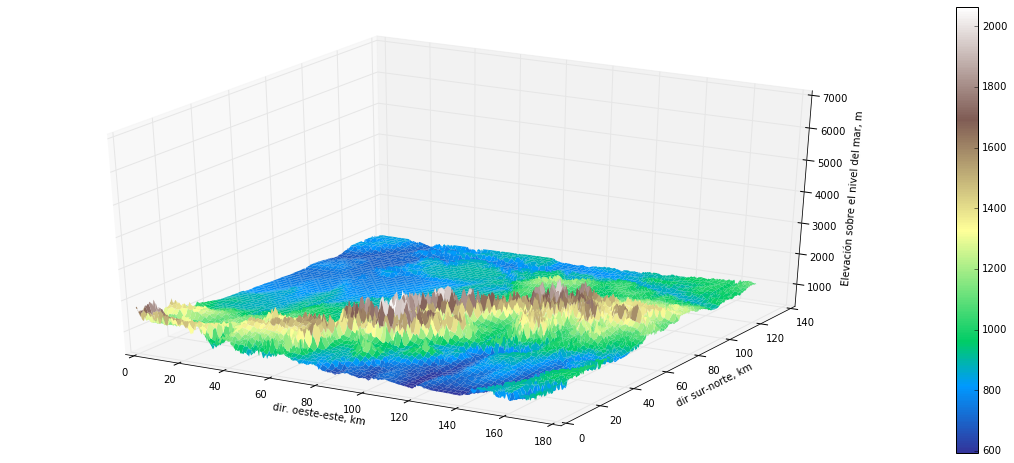

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=None, figsize=(20, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('dir. oeste-este, km')
ax.set_ylabel('dir sur-norte, km')
ax.set_zlabel('Elevación sobre el nivel del mar, m')

ax.set_zlim3d(400, 7000)
ax = ax.plot_surface(xx_seg, yy_seg, relieve_seg[:, :], cmap=cm.terrain, alpha=1, linewidth=0)
ax = fig.colorbar(ax)
plt.savefig("../mapas/imagenes/sierra_3D.png")

# MADRID

Se puede repetir el proceso anterior con el mapa de madrid y ver que comparten la zona de la sierra:

In [9]:
relieve_mad = np.loadtxt("../mapas/static/MDT200-MADRID-H30.asc", skiprows=6)
# relieve tiene las cotas de en metros, de norte a sur, de oeste a este.

In [10]:
# numero de columnas y de filas:

# se abre el archivo para lectura ('r' y se guarda en una variable seg.)
with open('../mapas/static/MDT200-MADRID-H30.asc', 'r') as mad:
    # se lee de la primera linea el numero de columnas y de la segunda el de filas. Como el método readline() devuelve un único
    # string, se usa el método split (convierte un string en una lista de strings) y nos quedamos con el segundo elemento [1]:
    N_col_mad = int(mad.readline().split()[1])
    N_fil_mad = int(mad.readline().split()[1])

# Generamos los ejes del mapa. multiplicamos el número de filas y de columnas por la distancia entre nodos: 0.2km
x_mad = np.arange(0, N_col_mad*0.2, 0.2)
y_mad = np.arange(0, N_fil_mad*0.2, 0.2)
# Generamos la malla.
xx_mad, yy_mad = np.meshgrid(x_mad, y_mad)
yy_mad = yy_mad[::-1]

Y se genera el plano:

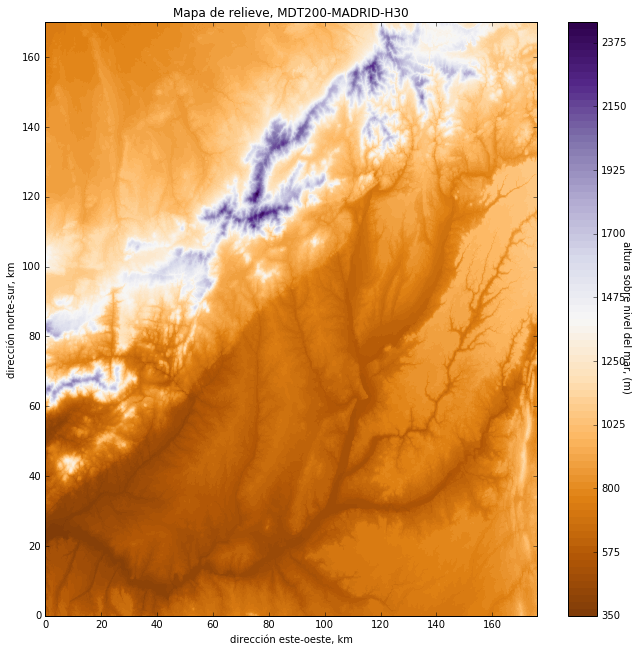

In [11]:
plt.figure(num=None, figsize=(N_col_mad/100 * 1.25, N_fil_mad/100*1.25), dpi=80)
plt.contourf(xx_mad, yy_mad, relieve_mad[:,:], 100, cmap=plt.cm.PuOr)
cbar = plt.colorbar()
cbar.set_label('altura sobre nivel del mar, (m) \n', rotation=270)
plt.savefig("../mapas/imagenes/detalle_sierra.png")
plt.title("Mapa de relieve, MDT200-MADRID-H30")
plt.xlabel("dirección este-oeste, km")
plt.ylabel("dirección norte-sur, km")

Además podría interesarnos guardar las matrices de datos sin los cabeceros para usarlas en otra ocasion medianta la función de numpy numpy.savetxt():

In [12]:
np.savetxt("../mapas/matrices/segovia.xls", relieve_seg) # no hace falta guardarlo en formato .txt
np.savetxt("../mapas/matrices/madrid.txt", relieve_mad)

O incluso podríamos centrarnos en una zona del terreno:
Sobre el mapa anterior, nos vamos a ir a una región situada entre los $200n_{0}$ y los $200n$ metros al oeste respecto a la esquina inferior izquierda del mapa anterior; y entre los $200(N\_fil\_mad-n)$
y $200(N\_fil\_mad-n0)$ m al norte.

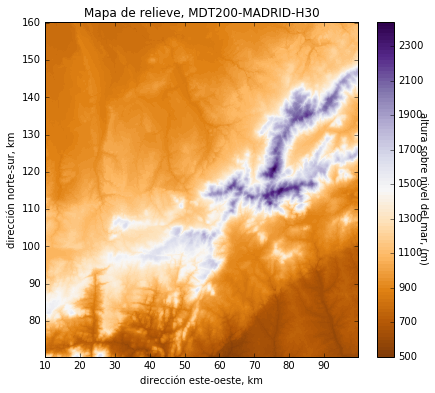

In [13]:
n0 = 50 
n = 500
zona_sierra_madrid = np.ones([n-n0, n-n0])
zona_sierra_madrid = relieve_mad[n0:n, n0:n]
plt.figure(num=None, figsize=(7, 6), dpi=80)
plt.contourf(xx_mad[n0:n, n0:n], yy_mad[n0:n, n0:n], relieve_mad[n0:n,n0:n], 100, cmap=plt.cm.PuOr)
cbar = plt.colorbar()
cbar.set_label('altura sobre nivel del mar, (m) \n', rotation=270)
plt.savefig("../mapas/imagenes/Madrid.png")
plt.title("Mapa de relieve, MDT200-MADRID-H30")
plt.xlabel("dirección este-oeste, km")
plt.ylabel("dirección norte-sur, km")

Para terminar podemos guardar este mapa de elevación en un archivo .txt con y sin encabezado:

In [14]:
# sin encabezado:
np.savetxt("../mapas/matrices/zona_oeste_sierra.txt", zona_sierra_madrid)

# con encabezado:
file = open("../mapas/matrices/zona_oeste_sierra_header.txt", 'w')   # se genera un archivo de escritura ('w') mediante
                                                                     # la función open
file.write("NCOLS {} \n".format(n-n0))             # se escribe el número de columnas; el método .format() nos permite introducir
                                                   # una variable en la linea de texto; y \n es un salto de linea
    
file.write("NROWS {}\n".format(n-n0))              # se escribe el número de filas 
file.write("XLLCENTER {}\n".format(334200+(n0)*200)) 
file.write("YLLCENTER {}\n".format(4483800+(N_fil_seg-n)*200)) # XLLCenter e YLLCenter indican la posición de la esquina 
                                                               #inferior izquierda de nuestra imagen.
file.write("CELLSIZE 200\n")
file.write("NODATA_VALUE -999\n")

for line in zona_sierra_madrid:                    # recorre las filas de la matriz
    for item in line:                              # recorre los elementos de la fila 
        file.write(str(item)+ ' ')                 # los transforma a texto (son float) y añade un espacio
    file.write("\n")                               # Cuando termina con la fila, añade un salto de linea.